In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
df=train_data.copy()
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


# Duplicates

In [3]:
# sizb of the dataset
print(df.shape)

(75757, 64)


In [4]:
# check number of duplicates for the whole datasets
print(df.duplicated().sum())
# Drop duplcates
df = df.drop_duplicates()
print( df.shape )

0
(75757, 64)


# check missing values

In [5]:
# return the columns with missing values and number of missing values
missing_data=df.isnull()
for column in missing_data.columns:
    if missing_data[column].value_counts()[False]!=len(df.index):
        print(column)
        print(missing_data[column].value_counts())
        print("") 
# if not intersted in number of missing values

year_built
False    73920
True      1837
Name: year_built, dtype: int64

energy_star_rating
False    49048
True     26709
Name: energy_star_rating, dtype: int64

direction_max_wind_speed
True     41082
False    34675
Name: direction_max_wind_speed, dtype: int64

direction_peak_wind_speed
True     41811
False    33946
Name: direction_peak_wind_speed, dtype: int64

max_wind_speed
True     41082
False    34675
Name: max_wind_speed, dtype: int64

days_with_fog
True     45796
False    29961
Name: days_with_fog, dtype: int64



In [6]:
print(df.year_built.unique())
year0=df[df.year_built==0]
print(year0.shape)
year_missing=df[df.year_built.isnull()]
print(year_missing.shape)

[1942. 1955. 1951. 1980. 1985. 1956. 1982. 1947. 1929. 1979. 1927. 1960.
 1924.   nan 1949. 1926. 1914. 1973. 1900. 1913. 1962. 1989. 1967. 1954.
 1986. 1906. 1912. 1902. 1920. 1905. 1997. 1909. 2002. 1974. 1907. 1908.
 1988. 1987. 1923. 1948. 1966. 1975. 1934. 1938. 1983. 2003. 1915. 1961.
 1911. 1925. 1964. 1953. 1957. 2006. 1990. 1991. 1969. 1968. 1910. 1937.
 1971. 1965. 1946. 1917. 1901. 2000. 2008. 1999. 1981. 2001. 1978. 1898.
 1928. 1970. 1918. 1930. 1903. 1936. 1921. 1922. 1984. 1976. 1952. 1959.
 1916. 1963. 1972. 1919. 1931. 1958.    0. 1994. 1940. 2010. 2009. 1889.
 1939. 1945. 1904. 1932. 1941. 1977. 1993. 1992. 1950. 1944. 1935. 1996.
 1995. 1933. 1943. 2007. 2005. 2004. 1869. 2011. 2012. 1864. 1998. 1895.
 1896. 1875. 1880. 1888. 1897. 1891. 2013. 1887. 1882. 1886. 1890. 1789.
 1868. 1885. 2014. 1867. 2015. 1829. 1844. 1871. 1893. 1892. 1879. 1860.
 1894. 1883. 1874. 1884. 1873. 1899. 1872. 1876. 1865. 1850. 1870. 1600.
 1848. 1857. 1877. 1836. 1853. 1881. 1649. 1827. 18

# check the categorical variables 

In [7]:
# Filter and display only df.dtypes that are 'object'/categorical variables
df.dtypes[df.dtypes == 'object']

State_Factor      object
building_class    object
facility_type     object
dtype: object

['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11']


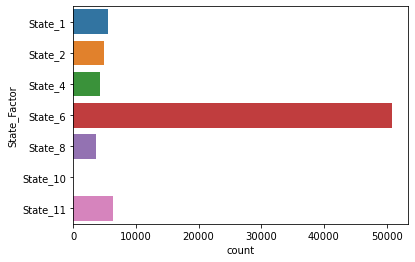

In [8]:
# Class distributions for 'state_factor'
print(df.State_Factor.unique())
sns.countplot(y='State_Factor', data=df)
plt.show()

Residential    43558
Commercial     32199
Name: building_class, dtype: int64


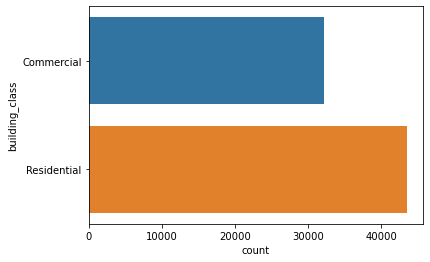

In [9]:
# Class distributions for 'building_class'
print(df.building_class.value_counts())
sns.countplot(y='building_class', data=df)
plt.show()

Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship              

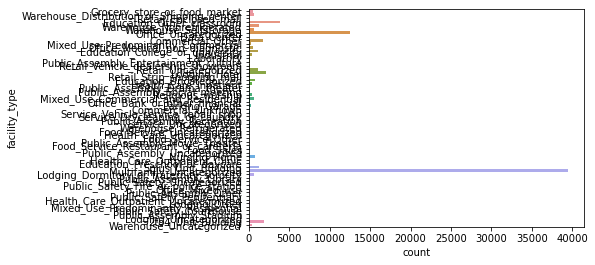

In [10]:
# Class distributions for 'facility_type'
print(df.facility_type.value_counts())
sns.countplot(y='facility_type', data=df)
plt.show()
sns.set(rc={'figure.figsize':(8,16)})

# Remove Outlier

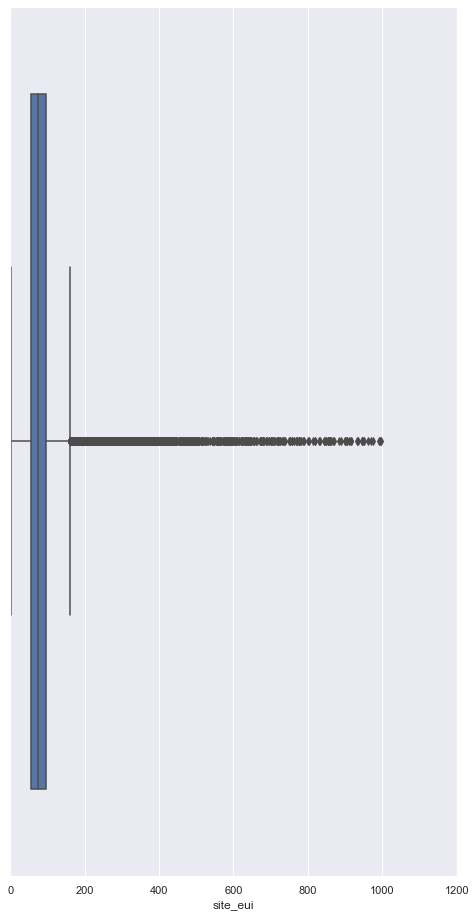

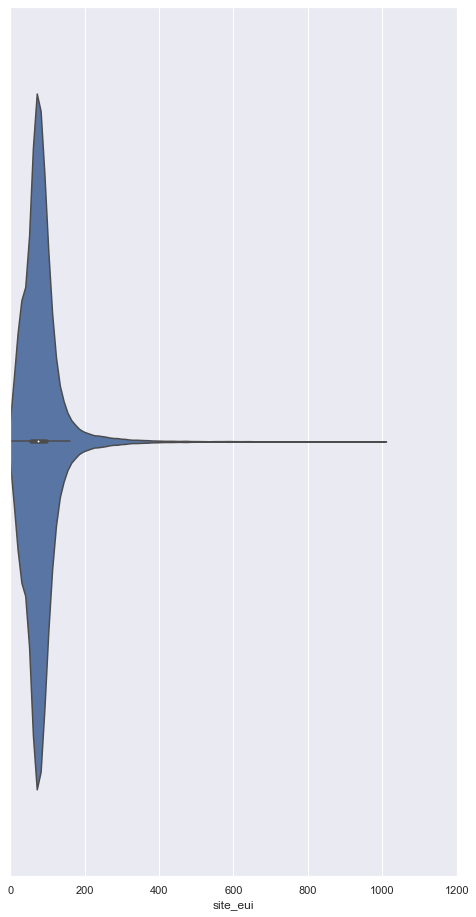

In [11]:
#boxplot of 'site_eui'
sns.boxplot(x='site_eui', data=df)
plt.xlim(0, 1200) # setting x-axis range to be consistent
plt.show()

# Violin plot of 'site_eui'
sns.violinplot(x='site_eui', data=df)
plt.xlim(0, 1200) # setting x-axis range to be consistent
plt.show()

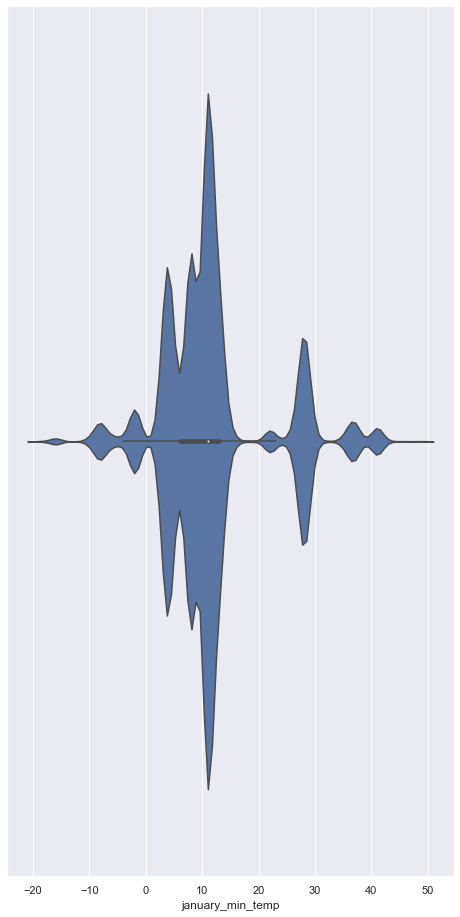

In [12]:
# Violin plot of 'january_min_temp'
sns.violinplot(x='january_min_temp', data=df)
plt.show()

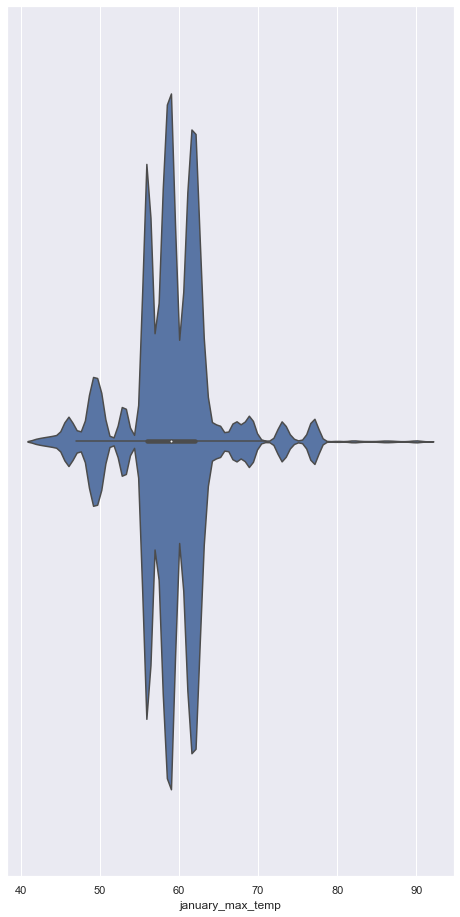

In [13]:
# Violin plot of 'january_max_temp'
sns.violinplot(x='january_max_temp', data=df)
plt.show()

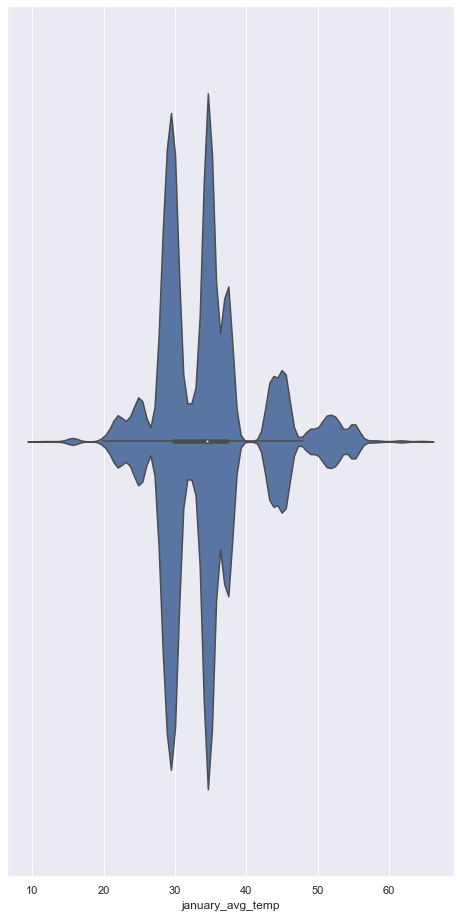

In [14]:
# Violin plot of 'january_avg_temp'
sns.violinplot(x='january_avg_temp', data=df)
plt.show()

# Take care of missing values

In [15]:
# return the columns with missing values and number of missing values
missing_data=df.isnull()
for column in missing_data.columns:
    if missing_data[column].value_counts()[False]!=len(df.index):
        print(column)
        print(missing_data[column].value_counts())
        print("") 
# if not intersted in number of missing values

year_built
False    73920
True      1837
Name: year_built, dtype: int64

energy_star_rating
False    49048
True     26709
Name: energy_star_rating, dtype: int64

direction_max_wind_speed
True     41082
False    34675
Name: direction_max_wind_speed, dtype: int64

direction_peak_wind_speed
True     41811
False    33946
Name: direction_peak_wind_speed, dtype: int64

max_wind_speed
True     41082
False    34675
Name: max_wind_speed, dtype: int64

days_with_fog
True     45796
False    29961
Name: days_with_fog, dtype: int64



In [16]:
# Display number of missing values for categorical values
df.select_dtypes(include=['object']).isnull().sum()

State_Factor      0
building_class    0
facility_type     0
dtype: int64

In [17]:
# Display number of missing values for numerical values
df.select_dtypes(exclude=['object']).isnull().sum()

Year_Factor                      0
floor_area                       0
year_built                    1837
energy_star_rating           26709
ELEVATION                        0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 61, dtype: int64

In [18]:
# # impute missing values using the median
# from sklearn.impute import SimpleImputer
# imputer =  SimpleImputer(strategy='median')
# # drop the categorical data, since median can only be applied to numerical 
# df_num = df.drop(['State_Factor','building_class','facility_type'],axis=1)
# imputer.fit(df_num)
# imputer.statistics_
#X=imputer.transform(df_num)
#df_num_cleaned=pd.DataFrame(X, columns=df_num.columns, index=df_num.index)

# numerical data cleaning pipelines

In [19]:
from  sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])


In [53]:
# create a copy of the numerical variables that need transformation
df_num_need_tr = df.drop(['id','Year_Factor','State_Factor','building_class',
                  'year_built','facility_type','site_eui'],axis=1)
df_num_tr=num_pipeline.fit_transform(df_num_need_tr)
df_num_tr=pd.DataFrame(df_num_tr, columns=df_num_need_tr.columns).reset_index()

In [39]:
df_num_tr.head()

,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,...,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
0,-0.424272,-2.244014,-0.611748,2.618884,2.314092,1.670279,1.850925,1.698778,1.724835,1.838593,...,-0.69105,-0.302936,-2.717656,-1.284612,-0.124112,-0.017181,-0.317352,-0.299344,-0.314077,-0.063586
1,0.437535,-0.780906,-0.621640,2.618884,2.314092,1.670279,1.850925,1.698778,1.724835,1.838593,...,-0.69105,-0.302936,-2.717656,-1.284612,-0.124112,-0.017181,-0.317352,-0.299344,-0.314077,-2.940165
2,0.461940,1.456789,-0.621640,2.618884,2.314092,1.670279,1.850925,1.698778,1.724835,1.838593,...,-0.69105,-0.302936,-2.717656,-1.284612,-0.124112,-0.017181,-0.317352,-0.299344,-0.314077,-2.940165
3,-0.448240,-0.737873,-0.621640,2.618884,2.314092,1.670279,1.850925,1.698778,1.724835,1.838593,...,-0.69105,-0.302936,-2.717656,-1.284612,-0.124112,-0.017181,-0.317352,-0.299344,-0.314077,-2.940165
4,-0.404999,1.585887,-0.611748,2.618884,2.314092,1.670279,1.850925,1.698778,1.724835,1.838593,...,-0.69105,-0.302936,-2.717656,-1.284612,-0.124112,-0.017181,-0.317352,-0.299344,-0.314077,-0.063586


In [21]:
# for missing 'year_built', we will use median value
print(df['year_built'].value_counts())
print(df['year_built'].median())
df['year_built'].fillna(df['year_built'].median(),inplace=True)

1927.0    2064
1929.0    1999
1928.0    1979
1930.0    1811
1925.0    1710
          ... 
1846.0       1
1833.0       1
1878.0       1
1841.0       1
1844.0       1
Name: year_built, Length: 180, dtype: int64
1951.0


# seperate numerical/categorical values

In [22]:
# transform some of the numerical to cat values
df['Year_Factor']=df['Year_Factor'].astype('object',copy=False)
df['year_built']=df['year_built'].astype('object',copy=False)

In [23]:
df_cat=df.select_dtypes(include=['object'])
print(df_cat.columns)

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'year_built'],
      dtype='object')


# categorical data cleaning pipelines

In [24]:
# group some cat values
df['year_built']=df['year_built'].apply(lambda x: 'old' if x<=1951 else 'new')
print(df['year_built'].unique())


['old' 'new']


In [25]:
df['facility_type'].value_counts()[df['facility_type'].value_counts() < 1000]

Nursing_Home                                 772
Education_Uncategorized                      709
Mixed_Use_Commercial_and_Residential         672
Lodging_Dormitory_or_fraternity_sorority     669
Warehouse_Distribution_or_Shipping_center    604
Warehouse_Selfstorage                        577
Grocery_store_or_food_market                 448
Office_Medical_non_diagnostic                447
Health_Care_Inpatient                        409
Religious_worship                            399
Industrial                                   384
Warehouse_Uncategorized                      330
Mixed_Use_Predominantly_Commercial           256
Parking_Garage                               251
Office_Bank_or_other_financial               173
Public_Assembly_Library                      160
Public_Safety_Fire_or_police_station         157
Public_Assembly_Other                        142
Service_Vehicle_service_repair_shop          138
Retail_Enclosed_mall                         120
Warehouse_Refrigerat

In [26]:
#print(df['facility_type'].value_counts())
df.loc[df['facility_type'].isin((df['facility_type'].value_counts()
                            [df['facility_type'].value_counts() < 1000]).index), 'facility_type'] = 'other'

In [27]:
print(df['facility_type'].value_counts())

Multifamily_Uncategorized          39455
Office_Uncategorized               12512
other                               9481
Education_Other_classroom           3860
Lodging_Hotel                       2098
2to4_Unit_Building                  1893
Commercial_Other                    1744
5plus_Unit_Building                 1273
Warehouse_Nonrefrigerated           1255
Retail_Uncategorized                1130
Education_College_or_university     1056
Name: facility_type, dtype: int64


In [28]:
df_cat=df[['Year_Factor','State_Factor','building_class',
                  'year_built','facility_type']]
for column in df_cat.columns:
        print(column)
        print(df_cat[column].value_counts())
        print("") 

Year_Factor
6    22449
5    18308
4    12946
3    10879
2     9058
1     2117
Name: Year_Factor, dtype: int64

State_Factor
State_6     50840
State_11     6412
State_1      5618
State_2      4871
State_4      4300
State_8      3701
State_10       15
Name: State_Factor, dtype: int64

building_class
Residential    43558
Commercial     32199
Name: building_class, dtype: int64

year_built
old    38809
new    36948
Name: year_built, dtype: int64

facility_type
Multifamily_Uncategorized          39455
Office_Uncategorized               12512
other                               9481
Education_Other_classroom           3860
Lodging_Hotel                       2098
2to4_Unit_Building                  1893
Commercial_Other                    1744
5plus_Unit_Building                 1273
Warehouse_Nonrefrigerated           1255
Retail_Uncategorized                1130
Education_College_or_university     1056
Name: facility_type, dtype: int64



In [52]:
# one-hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot=pd.DataFrame(df_cat_1hot.toarray()).reset_index()

In [54]:
print(df_num_tr.shape)
print(df_cat_1hot.shape)

(75757, 58)
(75757, 29)


In [57]:
df_temp=df_num_tr.merge(df_cat_1hot)
df_temp=df_temp.merge(df['site_eui'].reset_index())# need to reset index before merge
df_cleaned.head()

,index,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,...,18,19,20,21,22,23,24,25,26,27
0,0,-0.424272,-2.244014,-0.611748,2.618884,2.314092,1.670279,1.850925,1.698778,1.724835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.437535,-0.780906,-0.621640,2.618884,2.314092,1.670279,1.850925,1.698778,1.724835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0.461940,1.456789,-0.621640,2.618884,2.314092,1.670279,1.850925,1.698778,1.724835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,-0.448240,-0.737873,-0.621640,2.618884,2.314092,1.670279,1.850925,1.698778,1.724835,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,-0.404999,1.585887,-0.611748,2.618884,2.314092,1.670279,1.850925,1.698778,1.724835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
df.to_csv('df_cleaned.csv', index=None)